### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [5]:
# Importing vehicle data and removing rows with null values in any column
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import zscore
vc=pd.read_csv('C:/Users/Faisal/R4_Residency/R4_Lab_Internal/vehicle.csv').dropna()
vc.head(10)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus
6,97,43.0,73.0,173.0,65.0,6,153.0,42.0,19.0,143,176.0,361.0,172.0,66.0,13.0,1.0,200.0,204,bus
7,90,43.0,66.0,157.0,65.0,9,137.0,48.0,18.0,146,162.0,281.0,164.0,67.0,3.0,3.0,193.0,202,van
8,86,34.0,62.0,140.0,61.0,7,122.0,54.0,17.0,127,141.0,223.0,112.0,64.0,2.0,14.0,200.0,208,van
10,86,36.0,70.0,143.0,61.0,9,133.0,50.0,18.0,130,153.0,266.0,127.0,66.0,2.0,10.0,194.0,202,van
11,90,34.0,66.0,136.0,55.0,6,123.0,54.0,17.0,118,148.0,224.0,118.0,65.0,5.0,26.0,196.0,202,car


### 2. Print/ Plot the dependent (categorical variable) - Class column

Since the variable is categorical, you can use value_counts function

In [9]:
#Taking the count of different categories from the dependent variable
dv=vc['class'].value_counts()
dv.head()

car    413
bus    205
van    195
Name: class, dtype: int64

### Check for any missing values in the data 

In [11]:
#checking if any missing value is available in data
dv.isna().sum()

0

### 3. Standardize the data 

Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

In [47]:
#data is been standardized using z -score post dropping the depdendent/target variable
vc_scaled = vc.drop('class',axis=1).apply(zscore)
vc_class=vc['class']
vc_scaled.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.163231,0.520408,0.060669,0.264970,1.283254,0.299721,-0.198517,0.129648,-0.217151,0.766312,-0.397397,-0.339014,0.301676,-0.321192,-0.071523,0.371287,-0.321809,0.171837
1,-0.322874,-0.619123,0.124067,-0.836393,-0.599253,0.085785,-0.591720,0.514333,-0.606014,-0.337462,-0.590034,-0.618754,-0.502972,-0.053505,0.538425,0.147109,0.003400,0.442318
2,1.256966,0.845988,1.518823,1.187734,0.530251,0.299721,1.162569,-1.152637,0.949438,0.697326,1.111591,1.122486,1.415804,0.080339,1.555006,-0.413338,-0.159204,0.036596
3,-0.079822,-0.619123,-0.002729,-0.300595,0.153750,0.085785,-0.742952,0.642562,-0.606014,-0.337462,-0.911095,-0.738643,-1.462359,-1.258099,-0.071523,-0.301249,1.629444,1.524243
4,-1.052030,-0.130753,-0.763506,1.068668,5.173770,9.285029,-0.591720,0.514333,-0.606014,-0.268476,1.689501,-0.647299,0.425468,7.307905,0.538425,-0.189159,-1.460039,-1.721531


In [48]:
vc_class.head()

0    van
1    van
2    car
3    van
4    bus
Name: class, dtype: object

### K - Means Clustering

### Assign a dummy array called Cluster_error

### 5. Calculate errorrs for each K

Iterating values of k from 1 to 10 fit K means model
Using inertia

In [25]:
from sklearn.cluster import KMeans
cluster_range = range( 1, 10 )
Cluster_error = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters,n_init = 15, random_state=2)
  clusters.fit(vc_scaled)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  Cluster_error.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "Cluster_error": Cluster_error } )
clusters_df[0:10]

,num_clusters,Cluster_error
0,1,14634.000000
1,2,8623.136976
2,3,7037.467395
3,4,5739.286384
4,5,5192.924772
5,6,4706.433256
6,7,4350.686420
7,8,4087.480072
8,9,3867.629387


### 6. Plotting Elbow/ Scree Plot

Use Matplotlib to plot the scree plot - Note: Scree plot plots Errors vs the no of clusters

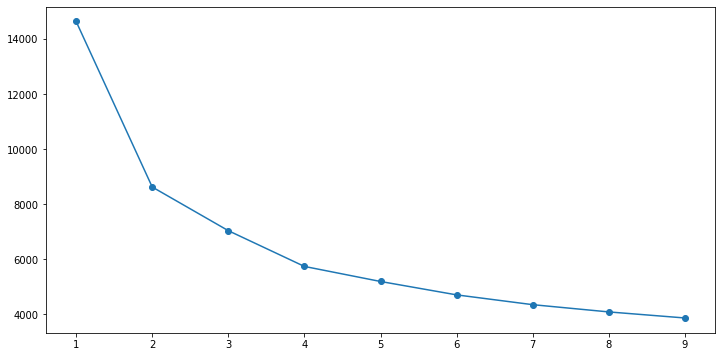

In [26]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.Cluster_error, marker = "o" )

### Find out the optimal value of K

In [28]:
print ('Since drop is steep til the value of cluster is increased to 3. Post 3, the slope is flattened to a great extent, hence optimal value for K should be 3 ')

Since drop is steep til the value of cluster is increased to 3. Post 3, the slope is flattened to a great extent, hence optimal value for K should be 3 


### Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

In [31]:
kmeans = KMeans(n_clusters=3, n_init = 10, random_state=2)
kmeans.fit(vc_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)

You can use kmeans.cluster_centers_ function to pull the centroid information from the instance

In [35]:
centroids=kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(vc_scaled) )
centroid_df

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,-0.919871,-0.520093,-0.893208,-1.064356,-0.500422,-0.219074,-0.779121,0.865893,-0.745356,-0.484632,-0.782403,-0.783411,-0.384982,0.838787,-0.095243,-0.301716,-1.054206,-1.110695
1,1.130765,1.170942,1.195006,1.019095,0.215052,0.342508,1.271805,-1.190612,1.275484,1.092668,1.220381,1.281327,1.079542,-0.028795,0.162290,0.265665,-0.005356,0.183801
2,-0.233962,-0.573875,-0.307769,-0.030413,0.205073,-0.116532,-0.459042,0.325063,-0.487988,-0.536044,-0.413809,-0.463663,-0.601550,-0.619241,-0.061780,0.010668,0.812786,0.698973


### 7. Store the centroids in a dataframe with column names from the original dataset given 

In [49]:
centroid_df = pd.DataFrame(centroids, columns = list(vc_scaled) )
centroid_df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,-0.919871,-0.520093,-0.893208,-1.064356,-0.500422,-0.219074,-0.779121,0.865893,-0.745356,-0.484632,-0.782403,-0.783411,-0.384982,0.838787,-0.095243,-0.301716,-1.054206,-1.110695
1,1.130765,1.170942,1.195006,1.019095,0.215052,0.342508,1.271805,-1.190612,1.275484,1.092668,1.220381,1.281327,1.079542,-0.028795,0.162290,0.265665,-0.005356,0.183801
2,-0.233962,-0.573875,-0.307769,-0.030413,0.205073,-0.116532,-0.459042,0.325063,-0.487988,-0.536044,-0.413809,-0.463663,-0.601550,-0.619241,-0.061780,0.010668,0.812786,0.698973


Hint: Use pd.Dataframe function 

### Use kmeans.labels_ function to print out the labels of the classes

In [63]:
# post modeeling, printing the cluster labels against the dependent variable class 
vc_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))
vc_labels['labels'] = vc_labels['labels'].astype('category')
vc_df_labeled = vc_scaled.join(vc_labels).join(vc_class)
vc_df_labeled[['labels','class']].head()

,labels,class
0,2,van
1,2,van
2,1,car
3,2,van
4,0,bus


## Hierarchical Clustering 

### 8. Variable creation

For Hierarchical clustering, we will create datasets using multivariate normal distribution to visually observe how the clusters are formed at the end

In [80]:
np.random.seed(101)  # for repeatability of this dataset
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.multivariate_normal.html

### 9. Combine all three arrays a,b,c into a dataframe

In [81]:
ar=np.concatenate((a,b,c))

In [137]:
df=pd.DataFrame(ar) 
df.head()

,0,1
0,13.882785,4.438501
1,11.687256,1.250981
2,10.316397,1.449346
3,9.837412,-2.041974
4,8.691601,-4.289773


### 10. Use scatter matrix to print all the 3 distributions

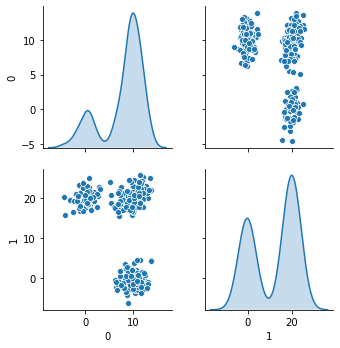

In [86]:
sns.pairplot(df,diag_kind='kde')

### 11. Find out the linkage matrix

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.linkage.html

Use ward as linkage metric and distance as Eucledian

In [87]:
from sklearn.cluster import AgglomerativeClustering 

In [91]:
model2 = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='ward')
model2.fit(df)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3,
                        pooling_func='deprecated')

### 12. Plot the dendrogram for the consolidated dataframe

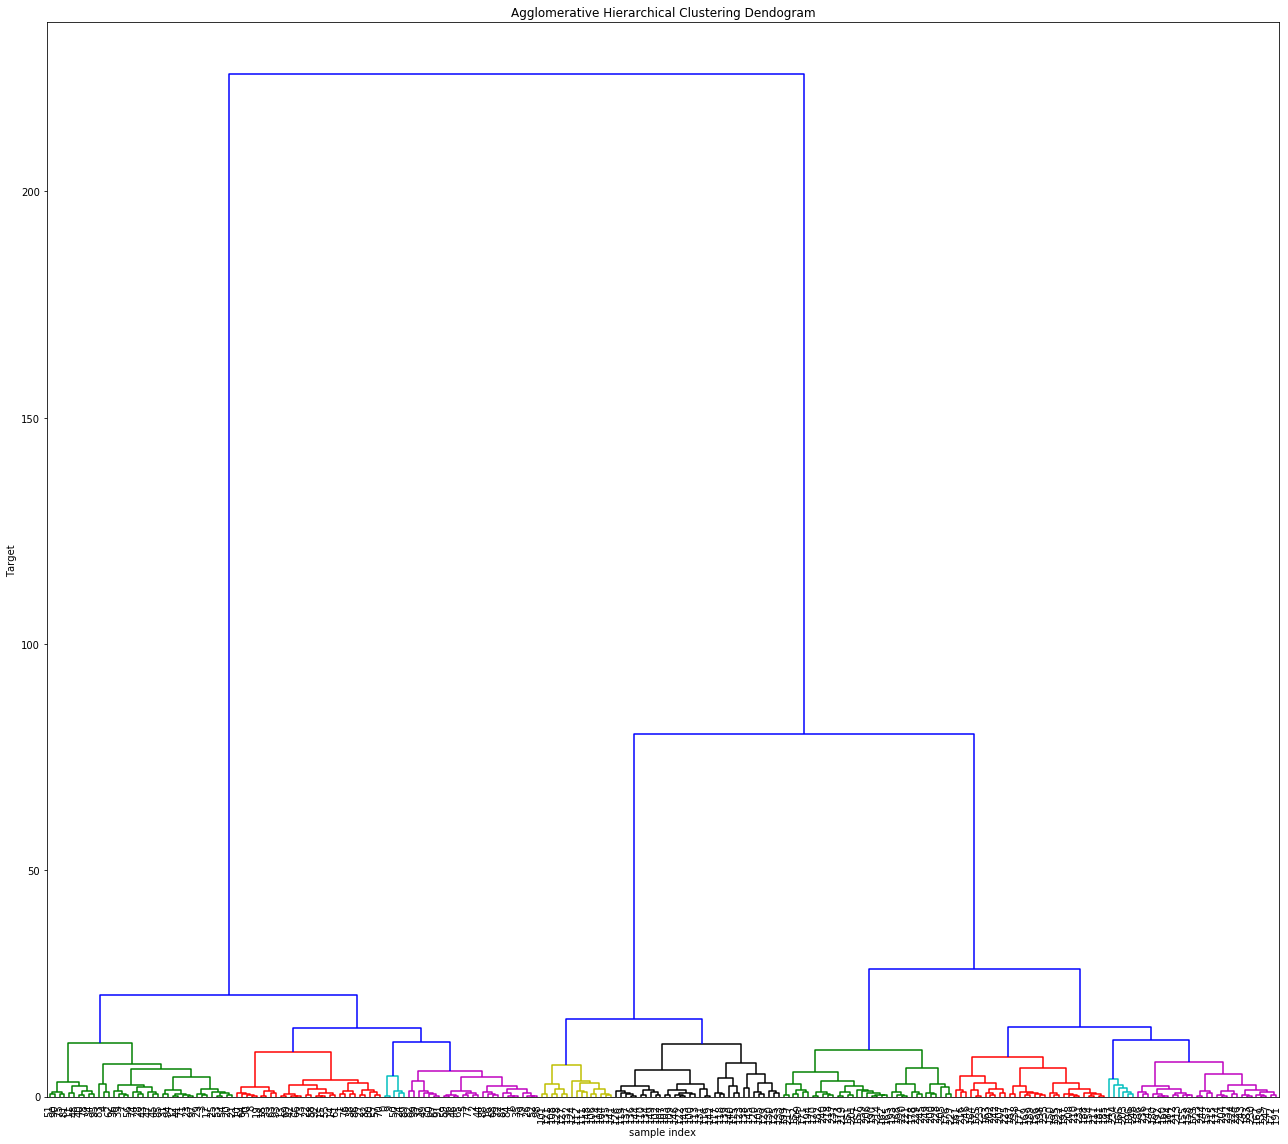

In [95]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
plt.figure(figsize=(18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Target')
Z = linkage(df, 'ward')
dendrogram(Z,leaf_rotation=90.0,p=25,color_threshold=12,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()

### 13. Recreate the dendrogram for last 12 merged clusters 

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html

Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram 

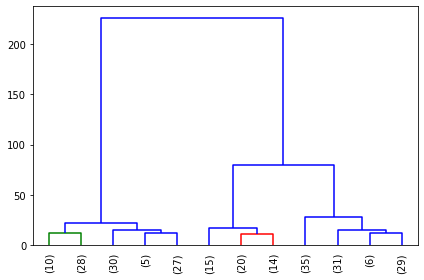

In [97]:
dendrogram(Z,leaf_rotation=90.0,p=12,color_threshold=12,leaf_font_size=10,truncate_mode='lastp')
plt.tight_layout()

### 14. From the truncated dendrogram, find out the optimal distance between clusters which u want to use an input for clustering data

https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.cluster.hierarchy.fcluster.html

In [98]:
print ('From the above dendogram, it is clear that optimal distance should be 50 for clustering data')

From the above dendogram, it is clear that optimal distance should be 50 for clustering data


### 15. Using this distance measure and fcluster function to cluster the data into 3 different groups

In [99]:
from scipy.cluster.hierarchy import ward, fcluster

In [138]:
fc=fcluster(Z, t=50, criterion='distance')

In [140]:
fc

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

### Use matplotlib to visually observe the clusters in 2D space 

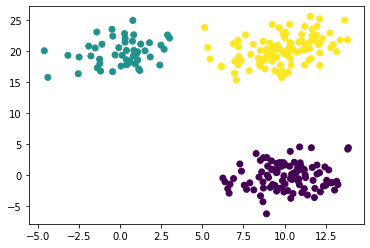

In [141]:
plt.scatter (df.iloc[:,0],df.iloc[:,1],c=fc)